Saving mobile_phones.csv to mobile_phones.csv
Хи-квадрат статистика: 5.119999999999999, p-значение: 0.8237245548918525
Колмогоров-Смирнов статистика: 0.02077087508350034, p-значение: 0.34930457854162356


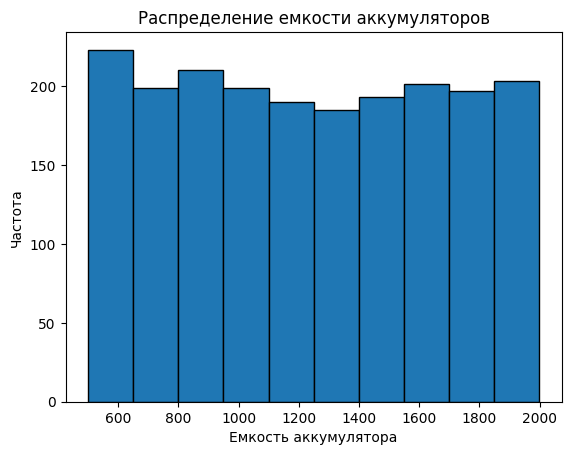

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка данных
uploaded = files.upload()

# Получаем имя загруженного файла
file_name = list(uploaded.keys())[0]

# Прочитайте загруженный файл
data = pd.read_csv(file_name)

# Предположим, что столбец с емкостью аккумулятора называется 'battery_capacity'
battery_capacity = data['battery_power']

# Формализация гипотез для критерия хи-квадрат Пирсона
# H0: Емкость аккумулятора следует равномерному распределению
# H1: Емкость аккумулятора не следует равномерному распределению

# Разбиваем данные на 10 равных интервалов
num_bins = 10
observed_freq, bins = np.histogram(battery_capacity, bins=num_bins)

# Ожидаемая частота для равномерного распределения
expected_freq = np.ones(num_bins) * len(battery_capacity) / num_bins

# Рассчитываем статистику хи-квадрат
chi2_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print(f"Хи-квадрат статистика: {chi2_stat}, p-значение: {p_value}")

# Формализация гипотез для критерия Колмогорова-Смирнова
# H0: Емкость аккумулятора следует равномерному распределению
# H1: Емкость аккумулятора не следует равномерному распределению

# Нормируем данные для теста Колмогорова-Смирнова
battery_capacity_normalized = (battery_capacity - battery_capacity.min()) / (battery_capacity.max() - battery_capacity.min())

# Применяем тест Колмогорова-Смирнова
D_stat, ks_p_value = stats.kstest(battery_capacity_normalized, 'uniform')

print(f"Колмогоров-Смирнов статистика: {D_stat}, p-значение: {ks_p_value}")

# Визуализация распределения емкости аккумуляторов
plt.hist(battery_capacity, bins=num_bins, edgecolor='black')
plt.title('Распределение емкости аккумуляторов')
plt.xlabel('Емкость аккумулятора')
plt.ylabel('Частота')
plt.show()


Оба теста (хи-квадрат и Колмогорова-Смирнова) показали высокие значения p, что означает отсутствие оснований для отклонения нулевой гипотезы. Таким образом,
можно сделать вывод, что емкость аккумуляторов следует равномерному распределению.

2

Уникальные значения в столбце 'wifi': [1 0]
Размер группы, поддерживающей Wi-Fi: 1014
Размер группы, не поддерживающей Wi-Fi: 986
Хи-квадрат статистика: [0.14527749 0.49680485 0.5518776  3.07923887 0.05532162 0.53966134
 0.0423443  1.39576193 0.07410986 1.11676333], p-значение: [0.70308984 0.48090742 0.45755152 0.07929763 0.81404924 0.46257311
 0.83696487 0.23743445 0.7854442  0.29061646]
Манна-Уитни статистика: [495016.  488972.  486280.5 511269.  503778.  491101.  504361.  483268.5
 499792.5 494281.5 503319.  534940.  517572.5 513189.  515536.  519140.5
 482975.5 501741.  505860.  999804.  510402. ], p-значение: [0.70515428 0.32833927 0.28911839 0.30930586 0.76200775 0.4308432
 0.72983125 0.1949871  0.9932642  0.66086214 0.79107065 0.00665599
 0.17115394 0.30347416 0.22485873 0.13509495 0.18926987 0.84703686
 0.59418341 0.         0.40100243]


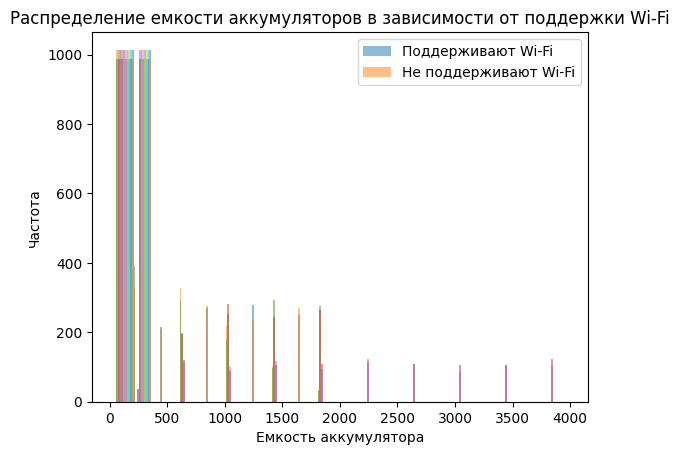

In [ ]:

# Предположим, что столбец с информацией о поддержке Wi-Fi называется 'wifi' и содержит значения 'yes' и 'no'
# А столбец с емкостью аккумулятора называется 'battery_capacity'
wifi_support = data['wifi']
battery_capacity = data['battery_power']

# Проверяем уникальные значения в столбце 'wifi'
print("Уникальные значения в столбце 'wifi':", wifi_support.unique())

# Разделим данные на две группы: поддерживающие Wi-Fi и не поддерживающие
battery_capacity_wifi_yes = df[df.wifi == 1]
battery_capacity_wifi_no = df[df.wifi == 0]

# Проверяем размеры групп
print("Размер группы, поддерживающей Wi-Fi:", len(battery_capacity_wifi_yes))
print("Размер группы, не поддерживающей Wi-Fi:", len(battery_capacity_wifi_no))

if len(battery_capacity_wifi_yes) == 0 or len(battery_capacity_wifi_no) == 0:
    print("Одна из групп пуста. Проверьте данные.")
else:
    # Формализация гипотез для критерия однородности хи-квадрат
    # H0: Распределение емкости аккумулятора одинаково для телефонов, поддерживающих и не поддерживающих Wi-Fi
    # H1: Распределение емкости аккумулятора различается для телефонов, поддерживающих и не поддерживающих Wi-Fi

    # Разбиваем данные на равные интервалы
    num_bins = 10
    observed_freq_yes, bins_yes = np.histogram(battery_capacity_wifi_yes, bins=num_bins)
    observed_freq_no, bins_no = np.histogram(battery_capacity_wifi_no, bins=num_bins)

    # Ожидаемая частота
    total_freq = observed_freq_yes + observed_freq_no
    expected_freq_yes = total_freq * len(battery_capacity_wifi_yes) / len(battery_capacity)
    expected_freq_no = total_freq * len(battery_capacity_wifi_no) / len(battery_capacity)

    # Рассчитываем статистику хи-квадрат
    chi2_stat, p_value = stats.chisquare(f_obs=[observed_freq_yes, observed_freq_no], f_exp=[expected_freq_yes, expected_freq_no])

    print(f"Хи-квадрат статистика: {chi2_stat}, p-значение: {p_value}")

    # Формализация гипотез для критерия Манна-Уитни
    # H0: Распределение емкости аккумулятора одинаково для телефонов, поддерживающих и не поддерживающих Wi-Fi
    # H1: Распределение емкости аккумулятора различается для телефонов, поддерживающих и не поддерживающих Wi-Fi

    # Применяем критерий Манна-Уитни
    u_stat, mw_p_value = stats.mannwhitneyu(battery_capacity_wifi_yes, battery_capacity_wifi_no, alternative='two-sided')

    print(f"Манна-Уитни статистика: {u_stat}, p-значение: {mw_p_value}")

    # Визуализация распределения емкости аккумуляторов для двух групп
    plt.hist(battery_capacity_wifi_yes, bins=num_bins, alpha=0.5, label='Поддерживают Wi-Fi')
    plt.hist(battery_capacity_wifi_no, bins=num_bins, alpha=0.5, label='Не поддерживают Wi-Fi')
    plt.title('Распределение емкости аккумуляторов в зависимости от поддержки Wi-Fi')
    plt.xlabel('Емкость аккумулятора')
    plt.ylabel('Частота')
    plt.legend(loc='upper right')
    plt.show()
